## Exercise 1: Weighted Average

The purpose of this exercise is to calculate the weighted average of a number of different measurements of the speed of light. This exercise can be done with pen and paper, excel or whatever tool you like. This notebook is structured in a way that facilitates working with the Pandas library.

This notebook helps to (marginally) develop your python skills and avoids you typing all the values. The exercise is meant to make you think about what you are doing and not so much how to do it. 

Given are the outcome of 5 measurements of the speed of light in km/sec from different experiment. Each measurement has a specified error defined as a standard deviation sigma. Both are stored in a numpy array to facilitate operation on these arrays

In [1]:
# speed of light in km/sec including the error specified as a standard deviation
import numpy as np
speed=np.array([299794, 299791, 299770, 299789, 299790])
sigma=np.array([3, 5, 2, 3, 4])

In [2]:
# the pandas library can be useful to deal with data. Here we only use it to display the data as a table
import pandas as pd
pd.DataFrame(data=list(zip(speed,sigma)),columns=['speed','sigma'])

,speed,sigma
0,299794,3
1,299791,5
2,299770,2
3,299789,3
4,299790,4


## Calculate the best value of the weighted average and include an error bar on the result given the above values. Motivate your answer. 

### Hints and tips

You could consider using a built-in averaging function in numpy. For instance one could simply call the numpy function via np.average(). See https://docs.scipy.org/doc/numpy/reference/generated/numpy.average.html for details. The use of numpy arrays will now become very useful as you can do operations on each element in the list, e.g. multiply all elements by a number, or square all the elements.

The normal average given as the incorrect answer below should give 299786.8 km/sec, but this value does not take into account the error bars.

The answer 299781.9 +/- 1.3 km/sec is not a correct answer, unless you can motivate that this should be the correct answer. I find 299791.1 +/- 1.8 km/sec a better and more acceptable answer. (Maybe it should be 299791 +/- 2 km/sec if you take into account significant digits).

In [18]:
# Insert your Python code to calculate the weighted average here
mean = np.average(speed, weights=1/sigma**2)
std = np.sqrt(1/np.sum(1/sigma**2))

print(f"The correct average speed of ligt is {mean:.1f} ± {std:.1f}")

# This is the normal average and is not the correct answer
print("The average speed of light is %6.1f \n" % np.average(speed))   

# Motivation/explanation of the calculation.
print("You cannot discard an outlier without proving it is an outlier.")


The correct average speed of ligt is 299781.9 ± 1.3
The average speed of light is 299786.8 

You cannot discard an outlier without proving it is an outlier.


299781.9497341711 5.3043974975759625


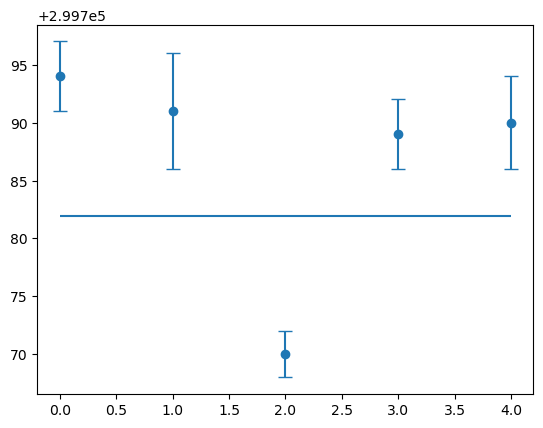

In [16]:
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

def func(x, a):
    return a


popt, pcov = curve_fit(func, [0, 1, 2, 3, 4], speed, p0=300000, sigma=sigma)

print(popt[0], pcov[0,0]**0.5)

plt.errorbar([0, 1, 2, 3, 4], speed, yerr=sigma, marker='o', capsize=5,
             linestyle='none')
plt.hlines(popt, xmin=0, xmax=4, ls='-')